# Geospatial Vector Data in Python

**Attribution**: Parts of this tutorial are developed based on the content from the following great sources: [Vector data in Python](https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python.html); and [Introduction to GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html).

In this lecture, you will learn how to interact with geospatial vector data in Python. In this lecture, our focus is on smaller datasets, and in the next one we will learn how to handle large datasets for scalable analysis. 

We will use the `GeoPandas` package to open, manipulate and write vector datasets.

## Intro to GeoPandas

<div>
    <center>
    <img src="https://carpentries-incubator.github.io/geospatial-python/fig/E07/pandas_geopandas_relation.png" width="900"/>
</div>

`GeoPandas` extends the popular `pandas` library for data analysis to geospatial applications. The main `pandas` objects (the `Series` and the `DataFrame`) are expanded to `GeoPandas` objects (`GeoSeries` and `GeoDataFrame`). This extension is implemented by including geometric types, represented in Python using the `shapely` library, and by providing dedicated methods for spatial operations (union, intersection, etc.). The relationship between `Series`, `DataFrame`, `GeoSeries` and `GeoDataFrame` can be briefly explained as follow:

- A `Series` is a one-dimensional array with axis, holding any data type (integers, strings, floating-point numbers, Python objects, etc.)
- A `DataFrame` is a two-dimensional labeled data structure with columns of potentially different types.
- A `GeoSeries` is a `Series` object designed to store shapely geometry objects.
- A `GeoDataFrame` is an extened `pandas.DataFrame`, which has a column with geometry objects, and this column is a `GeoSeries`.

Each `GeoSeries` can contain any geometry type (you can even mix them within a single `DataFrame`) and has a `GeoSeries.crs` attribute, which stores information about the projection. Therefore, each `GeoSeries` in a `GeoDataFrame` can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same geometry.

**Note**:
Only one `GeoSeries` in a `GeoDataFrame` is considered the *active* geometry, which means that all geometric operations applied to a `GeoDataFrame` operate on the *active* column.


In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from cartopy import crs as ccrs
import geodatasets
import pandas as pd

## Reading Files

In this section, we use the `geodatasets` package to find and fetch example spatial datasets. `geodatasets` contains an API on top of a JSON with metadata of externally hosted datasets containing geospatial information useful for illustrative and educational purposes.

In [2]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [5]:
nybb_gdf = gpd.read_file(geodatasets.get_path("ny.bb"))

In [6]:
nybb_gdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

You can also select to read only parts of the data using the `bbox`, `rows` or `mask` argument:

In [7]:
nybb_partial_gdf = gpd.read_file(geodatasets.get_path("ny.bb"), rows=2)

In [8]:
nybb_partial_gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...

You can retrieve the crs using the following:

In [9]:
nybb_gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Writing Files

You can write any `GeoDataFrame` to local disk and set the format using the `driver` argument. 

In [10]:
nybb_gdf.to_file("nybb.geojson", driver="GeoJSON")

## Constructing a GeoDataFrame manually

In [11]:
from shapely.geometry import Point

In [12]:
points_gdf = gpd.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

In [13]:
points_gdf

geometry  attribute1  attribute2
0  POINT (1 1)           1         0.1
1  POINT (2 2)           2         0.2

## Creating a GeoDataFrame from an existing dataframe

Let's create a `pandas DataFrame`:

In [14]:
cities_df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [15]:
cities_gdf = gpd.GeoDataFrame(
    cities_df, geometry=gpd.points_from_xy(cities_df.Longitude, cities_df.Latitude))

In [16]:
cities_gdf

City    Country  Latitude  Longitude               geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)

## Working with Attributes

All the attributes that are defined in `shapely` for objects, are available in `GeoSeries`. When you retrieve these from a `GeoDataFrame` however, you should note that they will be calculated based on the *active* geometry column. 

`area`: shape area (units of projection – see projections)

`bounds`: tuple of max and min coordinates on each axis for each shape

`total_bounds`: tuple of max and min coordinates on each axis for entire GeoSeries

`boundary`:a lower dimensional object representing the object’s set-theoretic boundary. (The boundary of a polygon is a line, the boundary of a line is a collection of points. The boundary of a point is an empty collection.)

`geom_type`: type of geometry.

`is_valid`: tests if coordinates make a shape that is reasonable geometric shape according to the Simple Feature Access standard.

In [17]:
nybb_gdf.columns

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [18]:
nybb_gdf["boundary"] = nybb_gdf.boundary
nybb_gdf["boundary"]

0    MULTILINESTRING ((970217.022 145643.332, 97022...
1    MULTILINESTRING ((1029606.077 156073.814, 1029...
2    MULTILINESTRING ((1021176.479 151374.797, 1021...
3    MULTILINESTRING ((981219.056 188655.316, 98094...
4    MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [19]:
nybb_gdf["centroid"] = nybb_gdf.centroid
nybb_gdf["centroid"]

0      POINT (941639.45 150931.991)
1    POINT (1034578.078 197116.604)
2     POINT (998769.115 174169.761)
3     POINT (993336.965 222451.437)
4      POINT (1021174.79 249937.98)
Name: centroid, dtype: geometry

With columnes `boundary` and `centroid` saved to the `nybb_gdf`, we now have three geometry comulmns in the same `GeoDataFrame`:

In [20]:
nybb_gdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  \
0  MULTIPOLYGON (((970217.022 145643.332, 970227....   
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...   
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...   
3  MULTIPOLYGON (((981219.056 188655.316, 980940....   
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...   

                                            boundary  \
0  MULTILINESTRING ((970217.022 145643.332, 97022...   
1  MULTILINESTRING ((1029606.077 156073.814, 1029...   
2  MULTILINESTRING ((1021176.479 151374.797, 1021...   
3  MULTILINESTRING ((981219.056 188655.316, 98094...   
4  MULTILINESTRING ((1012821.806 229228.265, 1012...   

                         centroid  
0    POINT (941639.45 150931.991)  
1  POINT (1034578.078 197116.604)  
2   POINT (998769.115 174169.761)  
3   POINT (993336.965 222451.437)  
4    POINT (1021174.79 249937.98)

## Applying Basic Methods

`distance()`: returns a `Series` with minimum distance from each entry to a sample point. 

`centroid`: returns a `GeoSeries` of centroids

`representative_point()`: returns a `GeoSeries` of points that are guaranteed to be within each geometry. It does NOT return centroids.

`to_crs()`: change coordinate reference system. See projections.

`plot()`: plot `GeoSeries`. See mapping.

We can measure the distance of each centroid from the first centroid location:

In [21]:
first_point = nybb_gdf["centroid"].iloc[0]
nybb_gdf["distance"] = nybb_gdf["centroid"].distance(first_point)
nybb_gdf["distance"]

0         0.000000
1    103781.535276
2     61674.893421
3     88247.742789
4    126996.283623
Name: distance, dtype: float64

## Plotting GeoPandas

Similar to `pandas`, if you call the `plot()` method of `GeoDataFrame` it will plot the active geometry column of it.

<Axes: >

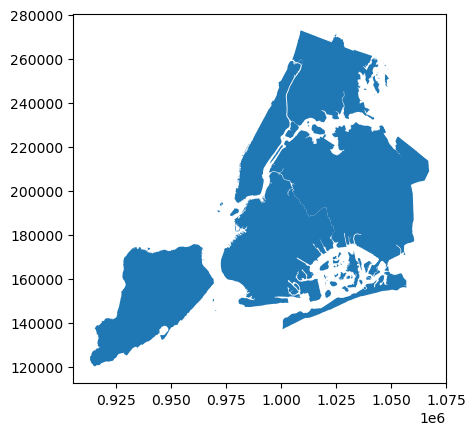

In [22]:
nybb_gdf.plot()

You can customize this and plot specific attributes of the `GeoDataFrame`. In the following, we will calculate the `area` of each object in the `GeoDataFrame` and plot it. 

In [23]:
nybb_gdf["area"] = nybb_gdf.area

<Axes: >

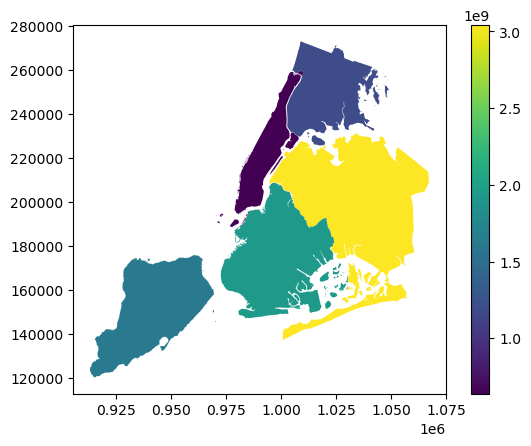

In [24]:
nybb_gdf.plot("area", legend=True)

There is also an interactive way to plot the data using the `explore` function. This uses folium/leaflet.js to plot the data. 

In [25]:
nybb_gdf.explore("area", legend=False)

Now, let's set  the centroid of each borough as the *active* geometry of the `GeoDataFrame`

In [26]:
nybb_gdf.set_geometry("centroid", inplace = True)

<Axes: >

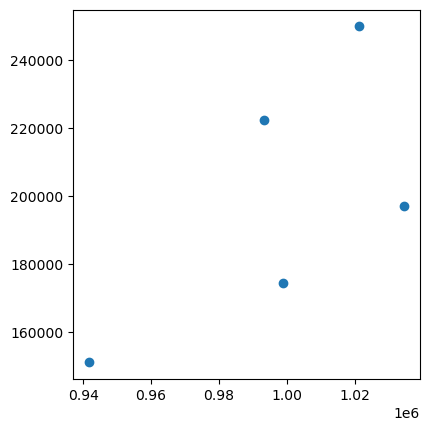

In [27]:
nybb_gdf.plot()

As you can see, the `plot()` method in this case plots the centroids which is the active geometry of the `GeoDataFrame`.

In [28]:
nybb_gdf.columns

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry',
       'boundary', 'centroid', 'distance', 'area'],
      dtype='object')

In [29]:
nybb_gdf.geometry

0      POINT (941639.45 150931.991)
1    POINT (1034578.078 197116.604)
2     POINT (998769.115 174169.761)
3     POINT (993336.965 222451.437)
4      POINT (1021174.79 249937.98)
Name: centroid, dtype: geometry

In [30]:
nybb_gdf["geometry"]

0    MULTIPOLYGON (((970217.022 145643.332, 970227....
1    MULTIPOLYGON (((1029606.077 156073.814, 102957...
2    MULTIPOLYGON (((1021176.479 151374.797, 102100...
3    MULTIPOLYGON (((981219.056 188655.316, 980940....
4    MULTIPOLYGON (((1012821.806 229228.265, 101278...
Name: geometry, dtype: geometry

**Note**: By default when you use the `read_file()` command, the column containing spatial objects from the file is named `“geometry”`, and is set as the *active* geometry column. However, despite using the same term for the name of the column and the name of the special attribute that keeps track of the active column, they are distinct. You can easily shift the *active geometry* column to a different `GeoSeries` with the `set_geometry()` command. Further, `gdf.geometry` will always return the active geometry column, not the column named `geometry`. If you wish to call a column named `“geometry”`, and a different column is the active geometry column, use `gdf['geometry']`, not `gdf.geometry`.

Let's set the geometry back to its original column

In [31]:
nybb_gdf.set_geometry("geometry", inplace = True)

Now, let's plot centroids on the same map as polygons:

<Axes: >

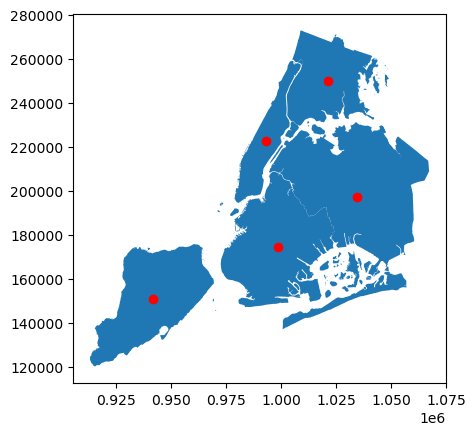

In [32]:
ax = nybb_gdf.plot()
nybb_gdf["centroid"].plot(ax = ax, color = "red")

## Plotting with CartoPy and GeoPandas

Let's load another dataset, and plot it with both `GeoPandas` and `CartoPy`. Our goal is to use the features of `CartoPy` to create a better visualization of the data in a `GeoDataFrame`.

We are going to also transform the projection of a `GeoDataFrame` to a different crs. 

In [33]:
land_gdf = gpd.read_file(geodatasets.get_url("naturalearth.land"))

<Axes: >

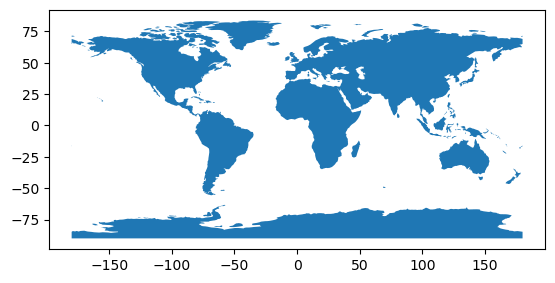

In [34]:
land_gdf.plot()

We can retrieve the CRS of the `GeoDataFrame`:

In [35]:
land_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We are going to a define a new CRS using `CartoPy`:

In [36]:
target_crs = ccrs.AzimuthalEquidistant()

And convert it to an EPSG CRS:

In [38]:
target_crs_proj4 = target_crs.to_proj4()

Now, we project the `land_gdf` GeoDataFrame to the new crs

In [39]:
land_gdf_ae = land_gdf.to_crs(target_crs_proj4)

<Axes: >

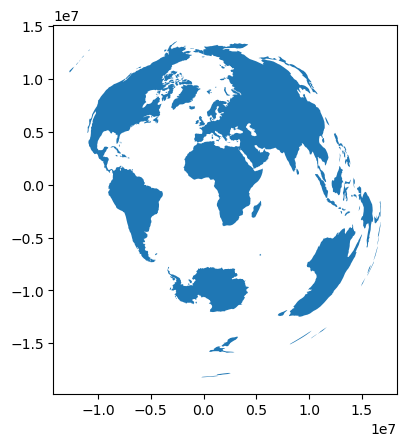

In [40]:
land_gdf_ae.plot()

We could have done this with CartoPy as well now that our data is in a crs understandable to CartoPy

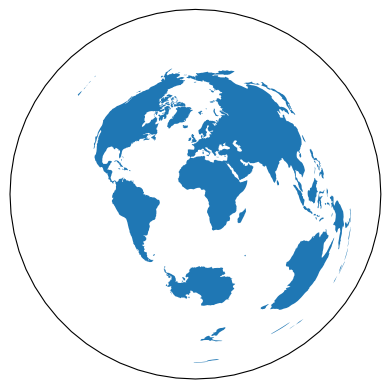

In [42]:
fig, ax = plt.subplots(subplot_kw={"projection": target_crs})
ax.add_geometries(land_gdf_ae["geometry"], crs=target_crs)

## Merging Data

We can merge different `GeoPandas` datasets using **attribute joins** or **spatial joins**.

In **attribute join**, a `GeoSeries` or `GeoDataFrame` is merged with a regular `pandas.Series` or `pandas.DataFrame` based on common variables (this is similar to merging in `pandas`).

In a **spatial join**, observations from two `GeoSeries` or `GeoDataFrame` are combined based on their spatial relationships to one another. 

Let's import two example datasets to work with:

In [43]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [44]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))


chicago_shapes = chicago[['geometry', 'NID']]

chicago_names = chicago[['community', 'NID']]


chicago = chicago[['geometry', 'community']].to_crs(groceries.crs)

In [45]:
chicago.head()

geometry        community
0  MULTIPOLYGON (((1181573.25 1886828.039, 118157...          DOUGLAS
1  MULTIPOLYGON (((1186289.356 1876750.733, 11862...          OAKLAND
2  MULTIPOLYGON (((1176344.998 1871187.546, 11763...      FULLER PARK
3  MULTIPOLYGON (((1182322.043 1876674.73, 118232...  GRAND BOULEVARD
4  MULTIPOLYGON (((1186289.356 1876750.733, 11862...          KENWOOD

In [46]:
groceries.head()

OBJECTID     Ycoord     Xcoord Status  \
0        16  41.973266 -87.657073   OPEN   
1        18  41.696367 -87.681315   OPEN   
2        22  41.868634 -87.638638   OPEN   
3        23  41.877590 -87.654953   OPEN   
4        27  41.737696 -87.625795   OPEN   

                                        Address               Chain Category  \
0          1051 W ARGYLE ST, CHICAGO, IL. 60640      VIET HOA PLAZA     None   
1  10800 S WESTERN AVE, CHICAGO, IL. 60643-3226   COUNTY FAIR FOODS     None   
2      1101 S CANAL ST, CHICAGO, IL. 60607-4932  WHOLE FOODS MARKET     None   
3  1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905        TARGET/SUPER      new   
4        112 W 87TH ST, CHICAGO, IL. 60620-1318         FOOD 4 LESS     None   

                                 geometry  
0   MULTIPOINT ((1168268.672 1933554.35))  
1  MULTIPOINT ((1162302.618 1832900.224))  
2  MULTIPOINT ((1173317.042 1895425.426))  
3  MULTIPOINT ((1168996.475 1898801.406))  
4  MULTIPOINT ((1176991.989 1847262.423))

### Appending

To append `GeoDataFrames` use pandas `concat()`. Keep in mind, that concatenated geometry columns need to have the same CRS.

In [47]:
joined_geometries = pd.concat([chicago.geometry, groceries.geometry])

joined_geometries

0      MULTIPOLYGON (((1181573.25 1886828.039, 118157...
1      MULTIPOLYGON (((1186289.356 1876750.733, 11862...
2      MULTIPOLYGON (((1176344.998 1871187.546, 11763...
3      MULTIPOLYGON (((1182322.043 1876674.73, 118232...
4      MULTIPOLYGON (((1186289.356 1876750.733, 11862...
                             ...                        
143               MULTIPOINT ((1171065.063 1899839.376))
144               MULTIPOINT ((1165217.798 1914159.975))
145               MULTIPOINT ((1166186.713 1883581.309))
146               MULTIPOINT ((1175778.816 1892214.445))
147               MULTIPOINT ((1185013.734 1832012.356))
Name: geometry, Length: 225, dtype: geometry

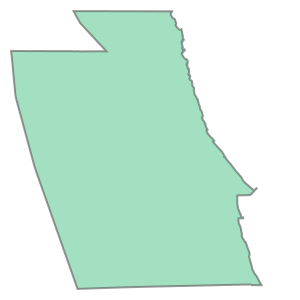

In [48]:
joined_geometries.iloc[9]

In [49]:
douglas = chicago[chicago.community == 'DOUGLAS']

oakland = chicago[chicago.community == 'OAKLAND']

douglas_oakland = pd.concat([douglas, oakland])

douglas_oakland

geometry community
0  MULTIPOLYGON (((1181573.25 1886828.039, 118157...   DOUGLAS
1  MULTIPOLYGON (((1186289.356 1876750.733, 11862...   OAKLAND

### Attribute Joins

Attribute joins are accomplished using the `merge()` method. We will use `chicago_shapes` and `chicago_names` which both have the NID attribute:

In [50]:
chicago_shapes.head()

geometry  NID
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...   35
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...   36
2  MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...   37
3  MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...   38
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...   39

In [51]:
chicago_names.head()

community  NID
0          DOUGLAS   35
1          OAKLAND   36
2      FULLER PARK   37
3  GRAND BOULEVARD   38
4          KENWOOD   39

In [52]:
chicago_shapes = chicago_shapes.merge(chicago_names, on='NID')

chicago_shapes.head()

geometry  NID        community
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...   35          DOUGLAS
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...   36          OAKLAND
2  MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...   37      FULLER PARK
3  MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...   38  GRAND BOULEVARD
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...   39          KENWOOD

In [53]:
type(chicago_shapes)

geopandas.geodataframe.GeoDataFrame

<Axes: >

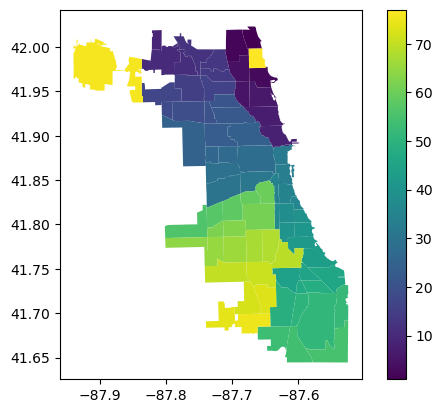

In [54]:
chicago_shapes.plot("NID", legend=True)

### Spatial Joins

In a spatial join, two geometry objects are merged based on their spatial relationship to one another.

`GeoPandas` provides two spatial-join functions:

- `GeoDataFrame.sjoin()`: joins based on binary predicates (intersects, contains, etc.)

- `GeoDataFrame.sjoin_nearest()`: joins based on proximity, with the ability to set a maximum search radius.

#### Binary predicate joins 

Binary predicate joins are available via `GeoDataFrame.sjoin()` which has two core arguments: `how` and `predicate`.

**predicate**

The `predicate` argument specifies how `GeoPandas` decides whether or not to join the attributes of one object to another, based on their geometric relationship. The default spatial index in `GeoPandas` currently supports the following values for `predicate` which are defined in the Shapely documentation:

- intersects
- contains
- within
- touches
- crosses
- overlaps

The following figures from the amazing [pygis.io](https://pygis.io/docs/e_spatial_joins.html#spatial-join-relationships) webiste provide an intuitive illustration of different predicate methods:

<div>
    <center>
    <img src="https://pygis.io/_images/overlay_contains.jpg" width="400"/>
    <img src="https://pygis.io/_images/overlay_crosses.jpg" width="400"/>
    <img src="https://pygis.io/_images/overlay_intersects.jpg" width="400"/>
    <img src="https://pygis.io/_images/overlay_overlaps.jpg" width="400"/>
    <img src="https://pygis.io/_images/overlay_touches.jpg" width="400"/>
    <img src="https://pygis.io/_images/overlay_within.jpg" width="400"/>
</div>

**how**

The `how` argument specifies the type of join that will occur and which geometry is retained in the resultant `GeoDataFrame`. It accepts the following options:

- `left`: All features from the first or left `GeoDataFrame` are kept, regardless if the features meet the specified spatial relationship criteria for a join. As all attribute fields are combined, rows that do not have a match with the right dataset may have null values in the fields that originated from the right `GeoDataFrame`.


- `right`: All features from the second or right `GeoDataFrame` are kept, regardless if the features meet the specified spatial relationship criteria for a join. As all attribute fields are combined, rows that do not have a match with the left dataset may have null values in the fields that originated from the left `GeoDataFrame`.

- `inner`: Only features from both datasets that meet the spatial relationship for the joined are kept. The geometries from the first or left `GeoDataFrame` are used for the join.

The following figure from [pygis.io](https://pygis.io/docs/e_spatial_joins.html#spatial-join-types) shows how these three join options operate (note that the "Outer" join is not implemented in `GeoPandas`):

<div>
    <center>
        <img src="https://pygis.io/_images/join_types.jpg" width="400"/>
</div>

Let's try this using the Chicago and Groceries `GeoDataFrames`:

In [55]:
chicago.head()

geometry        community
0  MULTIPOLYGON (((1181573.25 1886828.039, 118157...          DOUGLAS
1  MULTIPOLYGON (((1186289.356 1876750.733, 11862...          OAKLAND
2  MULTIPOLYGON (((1176344.998 1871187.546, 11763...      FULLER PARK
3  MULTIPOLYGON (((1182322.043 1876674.73, 118232...  GRAND BOULEVARD
4  MULTIPOLYGON (((1186289.356 1876750.733, 11862...          KENWOOD

In [56]:
groceries.head()

OBJECTID     Ycoord     Xcoord Status  \
0        16  41.973266 -87.657073   OPEN   
1        18  41.696367 -87.681315   OPEN   
2        22  41.868634 -87.638638   OPEN   
3        23  41.877590 -87.654953   OPEN   
4        27  41.737696 -87.625795   OPEN   

                                        Address               Chain Category  \
0          1051 W ARGYLE ST, CHICAGO, IL. 60640      VIET HOA PLAZA     None   
1  10800 S WESTERN AVE, CHICAGO, IL. 60643-3226   COUNTY FAIR FOODS     None   
2      1101 S CANAL ST, CHICAGO, IL. 60607-4932  WHOLE FOODS MARKET     None   
3  1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905        TARGET/SUPER      new   
4        112 W 87TH ST, CHICAGO, IL. 60620-1318         FOOD 4 LESS     None   

                                 geometry  
0   MULTIPOINT ((1168268.672 1933554.35))  
1  MULTIPOINT ((1162302.618 1832900.224))  
2  MULTIPOINT ((1173317.042 1895425.426))  
3  MULTIPOINT ((1168996.475 1898801.406))  
4  MULTIPOINT ((1176991.989 1847262.423))

Let's first plot the data:

<Axes: >

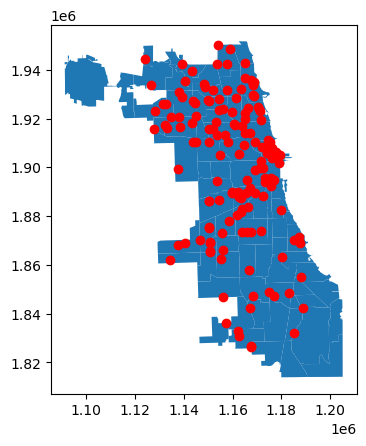

In [57]:
ax = chicago.plot()
groceries.plot(ax = ax, color="red")

Now, we will use the groceries `GeoDataFrame` to find communities from the chicago `GeoDataFrame` that `intersect` with the geometries of each grocery store:

In [58]:
groceries_with_community = groceries.sjoin(chicago, how="inner", predicate='intersects')
groceries_with_community.head()

OBJECTID     Ycoord     Xcoord Status  \
0        16  41.973266 -87.657073   OPEN   
1        18  41.696367 -87.681315   OPEN   
2        22  41.868634 -87.638638   OPEN   
3        23  41.877590 -87.654953   OPEN   
4        27  41.737696 -87.625795   OPEN   

                                        Address               Chain Category  \
0          1051 W ARGYLE ST, CHICAGO, IL. 60640      VIET HOA PLAZA     None   
1  10800 S WESTERN AVE, CHICAGO, IL. 60643-3226   COUNTY FAIR FOODS     None   
2      1101 S CANAL ST, CHICAGO, IL. 60607-4932  WHOLE FOODS MARKET     None   
3  1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905        TARGET/SUPER      new   
4        112 W 87TH ST, CHICAGO, IL. 60620-1318         FOOD 4 LESS     None   

                                 geometry  index_right       community  
0   MULTIPOINT ((1168268.672 1933554.35))           30          UPTOWN  
1  MULTIPOINT ((1162302.618 1832900.224))           73     MORGAN PARK  
2  MULTIPOINT ((1173317.042 1895425.426))           28  NEAR WEST SIDE  
3  MULTIPOINT ((1168996.475 1898801.406))           28  NEAR WEST SIDE  
4  MULTIPOINT ((1176991.989 1847262.423))           39         CHATHAM

**Question:** If we use `left` as the value for `how` in the `sjoin()` method, how will the result be different?

#### Nearest joins

Proximity-based joins can be done via `GeoDataFrame.sjoin_nearest()`.

`GeoDataFrame.sjoin_nearest()` shares the how argument with `GeoDataFrame.sjoin()`, and includes two additional arguments: `max_distance` and `distance_col`.

**max_distance**

The `max_distance` argument specifies a maximum search radius for matching geometries. This can have a considerable performance impact in some cases. If you can, it is highly recommended that you use this parameter.

**distance_col**

If set, the resultant `GeoDataFrame` will include a column with this name containing the computed distances between an input geometry and the nearest geometry.